##라이브러리 생성

In [350]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense


from sklearn.datasets import make_moons
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from matplotlib import pyplot
from pandas import DataFrame

##데이터 로드

In [274]:
from google.colab import drive 
drive.mount('/content/mnt')

Drive already mounted at /content/mnt; to attempt to forcibly remount, call drive.mount("/content/mnt", force_remount=True).


In [275]:
!cp /content/mnt/MyDrive/cau_project//data.zip ./

In [276]:
!unzip data.zip

Archive:  data.zip
  inflating: test.csv                
  inflating: train.csv               
  inflating: sample_submission.csv   


In [277]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
smpl_sub = pd.read_csv('sample_submission.csv')

In [278]:
train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
0,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white,5
1,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red,5
2,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white,5
3,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white,6
4,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white,6


In [279]:
test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,white
1,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,red
2,6.5,0.28,0.27,5.2,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,white
3,7.2,0.15,0.39,1.8,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,white
4,6.8,0.26,0.26,2.0,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,white


In [280]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5497 non-null   float64
 1   volatile acidity      5497 non-null   float64
 2   citric acid           5497 non-null   float64
 3   residual sugar        5497 non-null   float64
 4   chlorides             5497 non-null   float64
 5   free sulfur dioxide   5497 non-null   float64
 6   total sulfur dioxide  5497 non-null   float64
 7   density               5497 non-null   float64
 8   pH                    5497 non-null   float64
 9   sulphates             5497 non-null   float64
 10  alcohol               5497 non-null   float64
 11  type                  5497 non-null   object 
 12  quality               5497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 558.4+ KB


In [281]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1000 non-null   float64
 1   volatile acidity      1000 non-null   float64
 2   citric acid           1000 non-null   float64
 3   residual sugar        1000 non-null   float64
 4   chlorides             1000 non-null   float64
 5   free sulfur dioxide   1000 non-null   float64
 6   total sulfur dioxide  1000 non-null   float64
 7   density               1000 non-null   float64
 8   pH                    1000 non-null   float64
 9   sulphates             1000 non-null   float64
 10  alcohol               1000 non-null   float64
 11  type                  1000 non-null   object 
dtypes: float64(11), object(1)
memory usage: 93.9+ KB


In [282]:
# type에는 white와 red 두 종류가 있습니다.
# 각각 0,1로 변환합니다.
train['type'] = train['type'].map({'white':0, 'red':1}).astype(int)
test['type'] = test['type'].map({'white':0, 'red':1}).astype(int)


In [283]:
test.head()
train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
0,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,0,5
1,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,1,5
2,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,0,5
3,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,0,6
4,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,0,6


##데이터 정형화 

In [284]:
data = train.to_numpy()
print(data1.shape)

(5497, 13)


In [340]:
x = data[:,:12]
y = data[:,12:]

split_index = 1000

train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index:], y[split_index:] 



##모델 생성 및 훈련

In [341]:
model = keras.Sequential([
    keras.layers.Dense(12, activation='relu', input_shape=(12,)),
    keras.layers.Dense(12, activation='relu'),
    keras.layers.Dense(11, activation='softmax')
])

In [342]:
model.compile(optimizer="SGD", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_103 (Dense)            (None, 12)                156       
_________________________________________________________________
dense_104 (Dense)            (None, 12)                156       
_________________________________________________________________
dense_105 (Dense)            (None, 11)                143       
Total params: 455
Trainable params: 455
Non-trainable params: 0
_________________________________________________________________


In [343]:
from IPython.display import clear_output
from tensorflow.keras.callbacks import Callback

class PlotLosses(Callback):

  def on_train_begin(self, logs={}):

    self.i = 0
    self.x = []
    self.losses = []
    self.val_losses = []

    self.fig = plt.figure()

    self.logs = []


  def on_epoch_end(self, epoch, logs={}):

    self.logs.append(logs)
    self.x.append(self.i)
    self.losses.append(logs.get('loss'))
    self.val_losses.append(logs.get('val_loss'))
    self.i += 1

    clear_output(wait=True)
    plt.plot(self.x, self.losses, label="loss")
    plt.plot(self.x, self.val_losses, label="val_loss")
    plt.legend()
    plt.show();
    print("loss = ", self.losses[-1], ", val_loss = ", self.val_losses[-1])

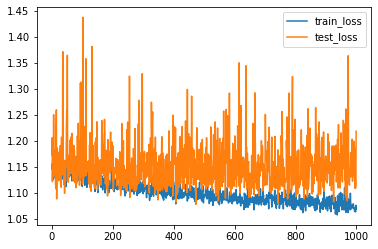

In [358]:
plot_losses = PlotLosses()

history = model.fit(train_x, train_y, epochs=2000, verbose=0, batch_size=20, validation_split=0.1)

pyplot.plot(history.history['loss'], label='train_loss')
pyplot.plot(history.history['val_loss'], label='test_loss')
pyplot.legend()
pyplot.show()

In [359]:
loss, acc = model.evaluate(test_x, test_y)

print("loss :", loss)
print("acc :", acc)

141/141 [==============================] - 0s 2ms/step - loss: 1.3428 - accuracy: 0.4654
loss : 1.3428130149841309
acc : 0.4654213786125183


In [361]:
y_ = model.predict(test_x)
print(y_)

[[1.6629259e-06 1.2823067e-06 2.1487215e-06 ... 3.5560135e-02
  2.5803193e-03 1.9918625e-06]
 [4.6759324e-05 4.9151527e-05 4.2745436e-05 ... 1.2377743e-02
  1.1327515e-03 5.0577059e-05]
 [5.0474078e-05 5.1304287e-05 4.8840368e-05 ... 1.3814453e-02
  1.5775663e-03 5.6283257e-05]
 ...
 [1.7932809e-05 1.2149821e-05 1.9136640e-05 ... 2.7299101e-02
  1.1267244e-03 9.3344879e-06]
 [4.3249420e-06 4.3805912e-06 4.0476930e-06 ... 1.8184153e-02
  7.2563702e-04 5.0438089e-06]
 [2.5490692e-04 2.6998922e-04 2.3652120e-04 ... 9.7752269e-03
  1.8158833e-03 2.6590598e-04]]


##분류표 제작

In [362]:
smpl_sub

,quality
0,0
1,0
2,0
3,0
4,0
...,...
995,0
996,0
997,0
998,0


In [363]:
smpl_sub['quality'] = y_pred

In [364]:
smpl_sub

,quality
0,5
1,5
2,5
3,5
4,6
...,...
995,5
996,6
997,5
998,6
